# Estimate the Redi and GM Diffusivities using the K tensor

In [2]:
# load modules 

import numpy as np
import xarray as xr
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
from matplotlib import colors, ticker, cm
from matplotlib.colors import LogNorm
%matplotlib inline
from funcs import *
import os 
from xgcm import Grid
from xarrayutils import aggregate
import copy
# Pseudo Inversion 
from scipy.linalg import pinv, eig

In [24]:
Lcoarse = 200e3

In [25]:
diff_tensor = xr.open_dataset('./outputs_ncfiles/diff_tensor_'+str(int(Lcoarse//1e3))+'km.nc')
Trac_coarse = xr.open_dataset('./outputs_ncfiles/Trac_coarse_'+str(int(Lcoarse//1e3))+'km')
Vels_coarse = xr.open_dataset('./outputs_ncfiles/Vels_coarse_'+str(int(Lcoarse//1e3))+'km')
T_coarse    = xr.open_dataset('./outputs_ncfiles/T_coarse_'+str(int(Lcoarse//1e3))+'km')

In [26]:
T_coarse['Siso_X'] = - T_coarse['T_X']/ T_coarse['T_Z']
T_coarse['Siso_Y'] = - T_coarse['T_Y']/ T_coarse['T_Z']

In [27]:
# Redi Diffusivity

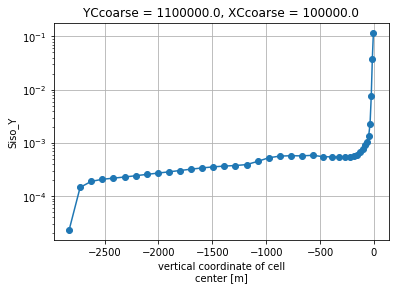

In [28]:
np.abs(T_coarse['Siso_Y'].sel(YCcoarse=1000e3, XCcoarse=0, method='nearest')).plot.line('o-')
plt.grid()
plt.yscale('log')

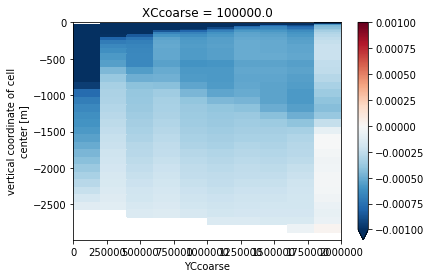

In [29]:
T_coarse['Siso_Y'].where(T_coarse.T_Z>2e-4).sel(XCcoarse=100e3, method='nearest').plot(vmin=-1e-3)

In [30]:
# Naive attempt to calculate Kgm 
KgmY =  diff_tensor.AT.isel(i=2, j=1)/T_coarse['Siso_Y'].where(T_coarse.T_Z>2e-4)
KgmX =  diff_tensor.AT.isel(i=2, j=0)/T_coarse['Siso_X'].where(T_coarse.T_Z>2e-4)

In [36]:
Kgm = diff_tensor.AT.isel(i=2, j=1).mean('XCcoarse') \
        /T_coarse['Siso_Y'].where(T_coarse.T_Z>2e-4).mean('XCcoarse')

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


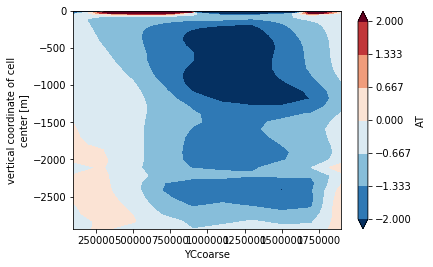

In [46]:
diff_tensor.AT.isel(i=2, j=1).mean('XCcoarse').plot.contourf(vmin =-2)

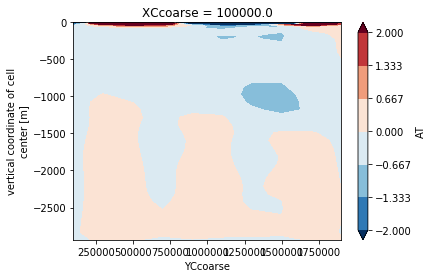

In [56]:
diff_tensor.AT.isel(i=2, j=1).sel(XCcoarse=100e3, method='nearest').plot.contourf(vmin =-2)

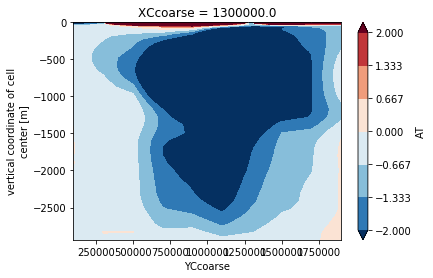

In [58]:
diff_tensor.AT.isel(i=2, j=1).sel(XCcoarse=1200e3, method='nearest').plot.contourf(vmin =-2)

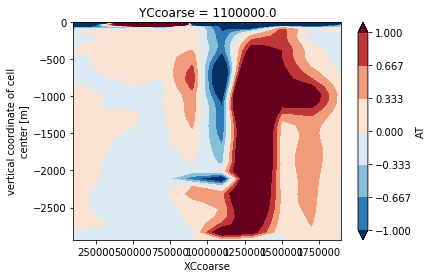

In [51]:
diff_tensor.AT.isel(i=2, j=0).sel(YCcoarse=1000e3,method='nearest').plot.contourf(vmin =-1)

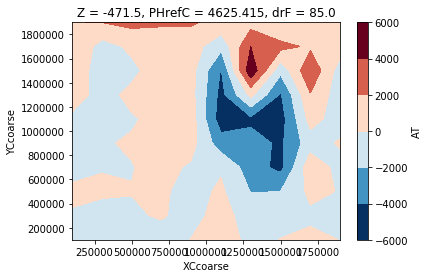

In [55]:
diff_tensor.AT.isel(i=0, j=1).sel(Z=-500,method='nearest').plot.contourf()

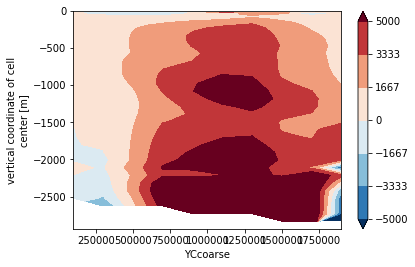

In [42]:
Kgm.plot.contourf(vmin=-5e3)

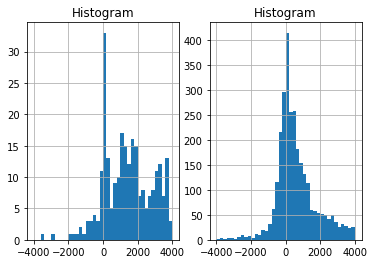

In [37]:
bins = np.linspace(-4000, 4000, 41)
plt.subplot(121)
Kgm.plot.hist(bins = bins)
#plt.yscale('log')
#plt.xscale('log')
plt.grid()

plt.subplot(122)
KgmY.plot.hist(bins = bins)
#plt.yscale('log')
#plt.xscale('log')
plt.grid()

In [33]:
Xcoarse = T_coarse.XCcoarse
Ycoarse = T_coarse.YCcoarse
Z = T_coarse.Z

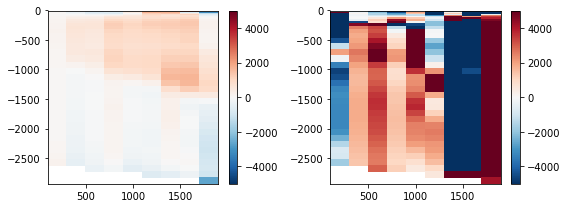

In [34]:
fig, ax = plt.subplots(1,2, figsize=(8,3))


im = ax[0].pcolormesh(Ycoarse/1e3, Z, KgmY.sel(XCcoarse=100e3, method='nearest')
                      , vmin=-5000, vmax=5000, cmap='RdBu_r')
fig.colorbar(im, ax=ax[0])

im = ax[1].pcolormesh(Ycoarse/1e3, Z, KgmX.sel(XCcoarse=100e3, method='nearest')
                      , vmin=-5000, vmax=5000, cmap='RdBu_r')
fig.colorbar(im, ax=ax[1])

plt.tight_layout()

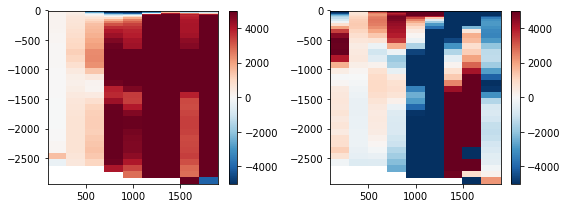

In [35]:
fig, ax = plt.subplots(1,2, figsize=(8,3))


im = ax[0].pcolormesh(Ycoarse/1e3, Z, KgmY.sel(XCcoarse=1200e3, method='nearest')
                      , vmin=-5000, vmax=5000, cmap='RdBu_r')
fig.colorbar(im, ax=ax[0])

im = ax[1].pcolormesh(Ycoarse/1e3, Z, KgmX.sel(XCcoarse=1200e3, method='nearest')
                      , vmin=-5000, vmax=5000, cmap='RdBu_r')
fig.colorbar(im, ax=ax[1])

plt.tight_layout()

In [23]:
KgmY_vermean = (KgmY * Kgm.drF).sum('Z') / Kgm.drF.sum('Z')
KgmX_vermean = (KgmX * Kgm.drF).sum('Z') / Kgm.drF.sum('Z')
KYY_vermean = (ST.isel(i=1,j=1)*ST.drF).sum('Z') / ST.drF.sum('Z')

NameError: name 'Kgm' is not defined